# <u><center>Anomaly Detection (Core)
* Authored by: Eric N. Valdez
* Date: 3/9/2024

# `Task` 
* In this assignment, you will use anomaly detection techniques to detect credit card fraud using this modified [dataset](https://drive.google.com/file/d/18FdD9FzthHNQiYkAsfGS9YDP7EAfDgzp/view) originally from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). Each row represents one credit card transaction. This dataset has anonymized features, except for the amount of the transaction.
* Your stake holder reports that they have found that about 0.4% of transactions are fraudulent, and 99.6% are valid.
* Your task will be to locate anomalous transactions in this data using KMeans and Isolation Forest models.

# `Imports`

In [14]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest 
from sklearn import set_config
from sklearn.datasets import make_blobs

# Warnings
import warnings

# Set filter warnings to ignore
warnings.filterwarnings('ignore')

set_config(transform_output='pandas')

# `Load Data`

In [4]:
# Loading and looking at the data
df = pd.read_csv('Data/credit_card.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  float64
 1   V2      10000 non-null  float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


# `Clean Data`

In [5]:
# Looking for duplicates
print('Number of Duplicated Rows', df.duplicated().sum())
print('\n')
df.info()

Number of Duplicated Rows 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  float64
 1   V2      10000 non-null  float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22   

In [6]:
# Looking over stats
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.254287,0.283266,0.919481,0.290123,-0.060268,0.119328,-0.068060,-0.065865,0.812108,-0.223647,...,0.030729,-0.057396,-0.158022,-0.030401,0.017295,0.085811,0.107121,0.006845,0.003067,64.520252
std,1.522637,1.314546,1.163288,1.427511,1.173778,1.299279,1.078250,1.255474,1.166215,1.099040,...,0.595192,0.907699,0.631906,0.489834,0.591947,0.430758,0.556106,0.404949,0.267988,185.221202
min,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,...,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000
25%,-1.027537,-0.214263,0.424669,-0.589896,-0.645458,-0.633723,-0.535728,-0.192522,0.072521,-0.688422,...,-0.149775,-0.271001,-0.555175,-0.172704,-0.329963,-0.162928,-0.325964,-0.083980,-0.015625,5.380000
50%,-0.383856,0.292181,0.954225,0.235755,-0.156229,-0.160367,-0.052060,0.011440,0.815950,-0.340435,...,-0.020913,-0.128229,-0.145288,-0.044523,0.078389,0.118709,0.040788,-0.004320,0.016480,15.950000
75%,1.146465,0.913810,1.611713,1.138298,0.359786,0.489572,0.472143,0.264272,1.517105,0.170406,...,0.160834,0.031776,0.238299,0.084179,0.407717,0.360469,0.467256,0.118735,0.078644,53.175000
max,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,...,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000


## <u>1. KMeans:
* ### Rememeber to scale you data.

In [7]:
# Scaling the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.726092,-0.270865,1.389980,0.762227,-0.236899,0.264052,0.285346,0.131083,-0.384443,0.286120,...,0.370795,0.043066,0.689788,-0.163478,0.083851,0.099198,-0.532722,0.312929,-0.090009,0.459472
1,0.949810,-0.013020,-0.647336,0.110710,0.102482,-0.155239,-0.009963,0.120253,-0.915428,0.051569,...,-0.167706,-0.185510,-0.760673,0.268858,-0.603364,0.188884,0.033761,-0.039088,0.043500,-0.333835
2,-0.725138,-1.235035,0.733929,0.062810,-0.377373,1.293991,0.797185,0.249752,-1.995239,0.392444,...,0.830447,0.336466,1.471338,1.918734,-1.193707,-0.959876,-0.442774,-0.153601,-0.234422,1.696110
3,-0.467623,-0.356408,0.750937,-0.808030,0.042565,0.868121,0.283501,0.353112,-1.885794,0.153501,...,-0.401179,-0.056083,0.258431,-0.326493,-2.015264,1.303733,-0.591732,0.137995,0.217896,0.318445
4,-0.593701,0.452248,0.540940,0.079101,-0.295578,-0.018016,0.613062,-0.163028,0.004829,0.888749,...,0.634808,0.052846,1.513434,-0.218569,0.209441,-0.677493,0.710640,0.524976,0.791442,0.029532


In [11]:
# Create dataset with 3 centers
X_, y_ = make_blobs(n_samples=300, centers=3, random_state=321)
X = pd.DataFrame(X_, columns=['x1','x2'])
X.head()

,x1,x2
0,7.793419,-7.149916
1,8.783409,-9.979164
2,7.467731,1.424818
3,9.204612,-5.804796
4,10.242530,-3.605225


In [15]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=3, n_init=10, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [16]:
# Making a dataframe copy of X for saving clusters 
df = X.copy()
df['cluster'] = kmeans.predict(X)
df.head()

,x1,x2,cluster
0,7.793419,-7.149916,1
1,8.783409,-9.979164,1
2,7.467731,1.424818,0
3,9.204612,-5.804796,2
4,10.242530,-3.605225,2


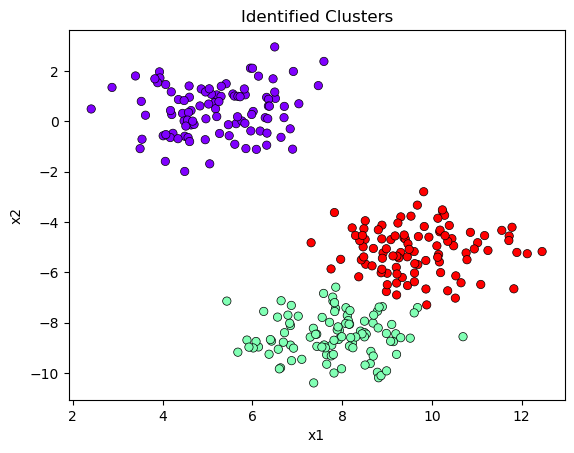

In [17]:
# Plot the data points and identified clusters
fig, ax = plt.subplots()
ax.scatter(df["x1"], df["x2"], c=df["cluster"], ec="black", lw=0.5, cmap="rainbow")
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters");

In [18]:
# Saving the cluster centers as a dataframe for visibility
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
cluster_centers

,x1,x2
0,5.218327,0.434833
1,7.809865,-8.512772
2,9.681187,-5.131638


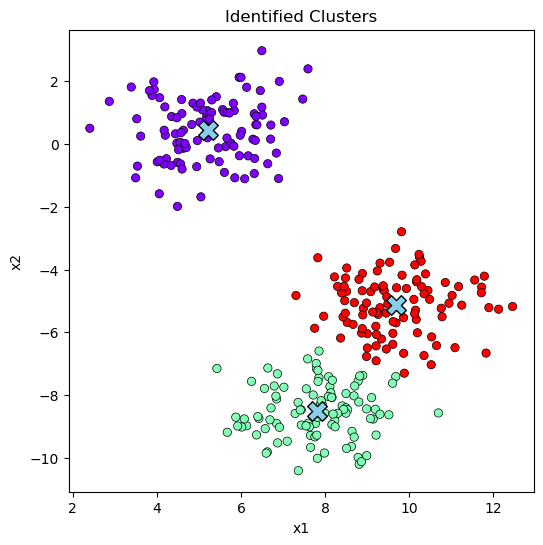

In [19]:
# Plot the data points and identified clusters
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df["x1"], df["x2"], c=df["cluster"], ec="black", lw=0.5, cmap="rainbow")
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters")
# Plot the cluster centers
centers = ax.scatter(
    cluster_centers["x1"],
    cluster_centers["x2"],
    color="skyblue",
    ec="black",
    s=200,
    marker="X",
);

> Scipy

In [20]:
# Use scipy.spatial.distance.cdist to create a matrix of distances between each data point and each cluster center
from scipy.spatial.distance import cdist
# Calculate distance to each cluster center
distances = cdist(X, kmeans.cluster_centers_, 'euclidean')

In [21]:
# Distances shape is (# rows, # clusters)
distances.shape

(300, 3)

In [22]:
# Compare to X (#rows, # features)
X.shape

(300, 2)

In [23]:
# Saving distances as a dataframe for convenience
cluter_cols = [f"Distance (Cluster {c})" for  c in range(len(kmeans.cluster_centers_))]
distance_df = pd.DataFrame(distances, columns = cluter_cols)
distance_df.head(3)

,Distance (Cluster 0),Distance (Cluster 1),Distance (Cluster 2)
0,8.009963,1.362955,2.763533
1,11.007322,1.760140,4.929960
2,2.457618,9.943477,6.920007


In [24]:
# Get the minimum distance to any cluster for each point
min_distances = np.min(distances, axis=1)
# Display first 5 values
min_distances[:5]

array([1.36295536, 1.76013984, 2.45761801, 0.82478221, 1.62635919])

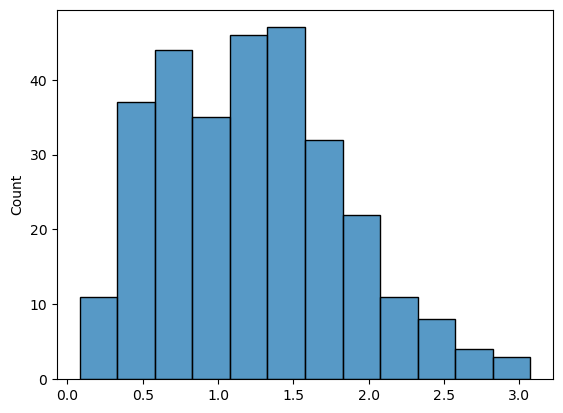

In [25]:
# distance from closet centroid
ax = sns.histplot(min_distances)

> Threshold list

In [26]:
# Define a list of the indices of the anomalous data using the threshold given by the stakeholder (99.6% valid).
# Set a threshold based on a percentile
threshold = np.percentile(min_distances, 99.6)
threshold

2.8721072522826137

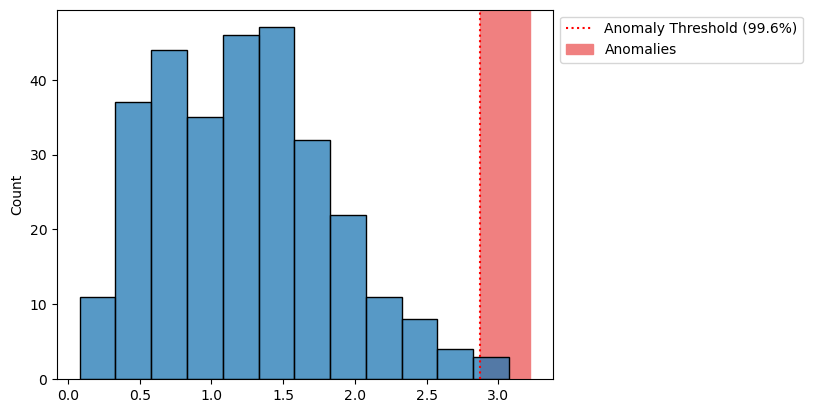

In [27]:
# Visualize the distribution of distances and the anomaly threshold.
ax = sns.histplot(min_distances)
ax.axvline(threshold, color='red', ls=':', label='Anomaly Threshold (99.6%)')
ax.axvspan(threshold, ax.get_xlim()[1], color='lightcoral',zorder=0, label='Anomalies')
ax.legend(bbox_to_anchor=[1,1]);

In [28]:
# Identify anomalies where the distance to closest cluster center is above the threshold
filter_anomalies = min_distances > threshold
# how many were found?
filter_anomalies.sum()

2

In [29]:
# Getting the row indices of the anomalies
idx_anomalies = X[filter_anomalies].index
idx_anomalies

Int64Index([105, 276], dtype='int64')

In [40]:
# Slicing the anomalies from X (for demonstration)
X.iloc[idx_anomalies]

,x1,x2
105,10.690949,-8.563954
276,7.592333,2.387104


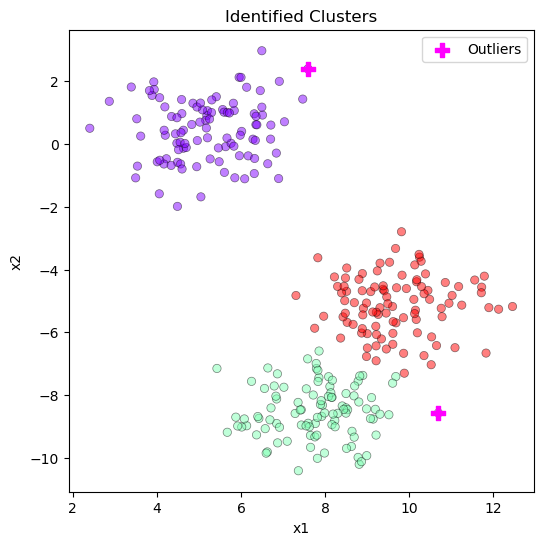

In [41]:
# Plot the data points and identified clusters
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(
    df["x1"], df["x2"], c=df["cluster"], ec="black", lw=0.5, cmap="rainbow", alpha=0.5
)
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters")
## Plotting the anomalies for visibility.
X.iloc[idx_anomalies].plot(
    x="x1", y="x2", kind="scatter", color="magenta", label="Outliers", ax=ax, marker='P',s=100,
);

### Note that you cannot visualize your clusters since this dataset has 29 features. 
`(To visualize, you could apply PCA to reduce the dimensionality to 2 features, but visualization is not required.)` 

## <u>2. Isolation Forest:
* `Note:` If you added any columns to the original dataset in the previous step, be sure to exclude them before fitting your Isolation Forest.
* Instantiate and fit an Isolation Forest with the correct contamination value based on the threshold given by the stakeholder `(Be Careful: 0.4% = 0.004)`. Please use a randome state of 42 for your model
* Define a list of the indices of anomalous data. `Rememeber` that anomalies are marked as `-1`, and normal data is marked `1`.

In [31]:
# Define the original features
X = df[['x1','x2']]
X.head()

,x1,x2
0,7.793419,-7.149916
1,8.783409,-9.979164
2,7.467731,1.424818
3,9.204612,-5.804796
4,10.242530,-3.605225


In [32]:
# Instantiate the model with a contaimination of 0.004 (we will identify .4% as anamolous)
iso_004 = IsolationForest(contamination=0.05, random_state = 42)
# fit the model using .values to avoid a warning
iso_004.fit(X.values)

IsolationForest(contamination=0.05, random_state=42)

In [33]:
# Obtain results from the model
predictions = iso_004.predict(X.values)
predictions[:100]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1])

In [34]:
# Change the labels to match our columns from the kmeans dataframe
# Not anamolies
predictions[predictions ==1] = 0
# Anomalies
predictions[predictions ==-1] = 1
# Preview new labels
predictions[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [35]:
# Add isolation forest predictions to the dataframe
df['anomaly-iso_004'] = predictions
# Preview dataframe with new column
df.head()

,x1,x2,cluster,anomaly-iso_004
0,7.793419,-7.149916,1,0
1,8.783409,-9.979164,1,0
2,7.467731,1.424818,0,0
3,9.204612,-5.804796,2,0
4,10.242530,-3.605225,2,0


In [56]:
# Create a range of k numbers of clusters
ks = range(2,11)

## Create lists to hold the inertia and silhouette scores
inertias = []
sils = []

## Loop over k values to determine the best number of clusters for the model
for k in ks:
    ## create and fit a KMeans model
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_scaled)
    print(f'fitting KMeans with {k} clusters')
    
    ## Append the inertia and silhouette scores to the lists
    inertias.append(kmeans.inertia_)
    sils.append(silhouette_score(X_scaled, kmeans.labels_))

fitting KMeans with 2 clusters
fitting KMeans with 3 clusters
fitting KMeans with 4 clusters
fitting KMeans with 5 clusters
fitting KMeans with 6 clusters
fitting KMeans with 7 clusters
fitting KMeans with 8 clusters
fitting KMeans with 9 clusters
fitting KMeans with 10 clusters


In [57]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X_scaled)

In [58]:
# Find distances
from scipy.spatial.distance import cdist
cluster_centers = kmeans.cluster_centers_
cluster_centers
distances = cdist(X_scaled, cluster_centers, 'euclidean')
distances[:5]

array([[2.80468161, 4.39326354, 5.85721494],
       [2.42642963, 3.68608746, 5.07508117],
       [6.5426218 , 7.33737825, 8.65600243],
       [4.74252086, 5.67396639, 6.85457651],
       [3.24973107, 4.47873459, 6.10443916]])

In [60]:
# Create a filter for which data points are outside the distance threshold
kmeans_filter = min_distances > threshold
kmeans_filter

# Filter the original dataset to inspect the anomalous data
kmeans_anomalies = df[kmeans_filter]
kmeans_anomalies

,x1,x2,cluster,anomaly-iso_004
105,10.690949,-8.563954,1,1
276,7.592333,2.387104,0,1


In [61]:
# As a tree-based model, the data does not need to be scaled.  
# Set contamination to .003
iso = IsolationForest(contamination=.003, random_state=42).fit(df)


## Make predictions
predictions = iso.predict(df)
predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [62]:
# Create a filter
iso_filter = predictions == -1
iso_filter

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [63]:
iso_anomalies = df[iso_filter]
iso_anomalies

,x1,x2,cluster,anomaly-iso_004
161,6.495709,2.963979,0,1


In [67]:
# # Comparing number of anomalies found
# kmeans_anomalies = df['kmeans_filter'].sum()
# print(f'Kmeans (threshold = 99.6) identified {kmeans_anomalies} anomalies.')
# isoforest_anomalies = df['anomaly-iso_004'].sum()
# print(f'Isoforest (contaminatin = 0.004) identified {isoforest_anomalies} anomalies.')

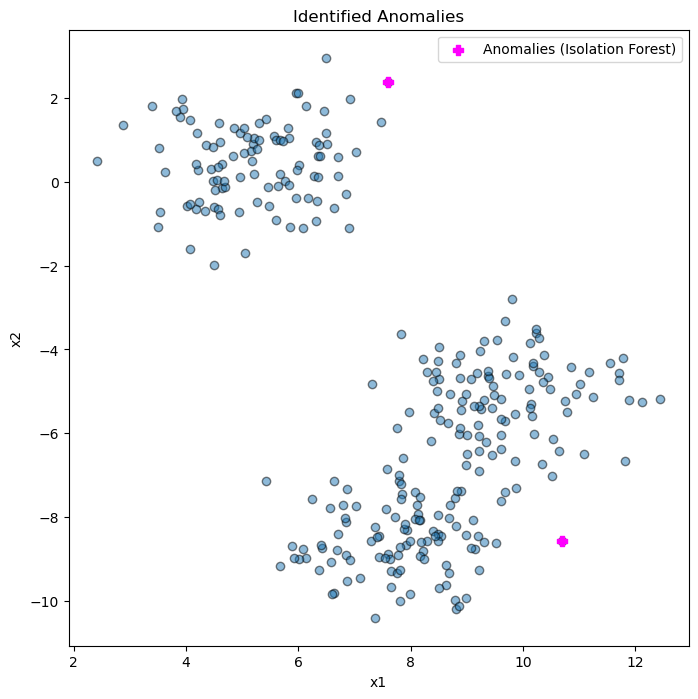

In [38]:
# Plot the original data points
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df['x1'], df['x2'], ec= 'black', alpha = 0.5)
ax.set_title("Identified Anomalies")  
    
# Plot the anomalies identified by the isolation forest
df.loc[idx_anomalies].plot(
    x="x1", y="x2", kind="scatter", color="magenta", label="Anomalies (Isolation Forest)", 
    ax=ax, marker='P', s=50);

In [70]:
# # Define anomalies identified by kmeans
# kmeans_anomalies = df[df['kmeans_filter'] == 1]
# # Define anomalies identified by isolation forest
# iso_004_anomalies = df[df['anomaly-iso_004'] == 1]
# # Define anomalies identified by both models
# both_anomalies = df[(df['anomaly-iso_004'] == 1)& (df['kmeans_filter'] == 1)]
# # Plot the data points and identified clusters
# fig, ax= plt.subplots(figsize=(8, 8))
# # Plot data
# ax.scatter(df["x1"], df["x2"], ec = 'black', alpha=0.5)
# ax.set_title("Comparing Models")
# # Annotate KMeans anomalies
# kmeans_anomalies.plot(x="x1", y="x2", kind="scatter", color="magenta", label="Anomalies only KMeans Distance", ax=ax, marker='P',s=50)
# # Annotate Iso Forest anomalies
# iso_004_anomalies.plot(x="x1", y="x2", kind="scatter", color="blue", label="Anomalies only Isolation Forest", ax=ax, marker='P',s=50)
# # Annotate Anomolies identified by both models
# both_anomalies.plot(x="x1", y="x2", kind="scatter", color="red", label="Anomalies Models Agree on", ax=ax, marker='P',s=50);

## <u>3. Compare the list of anomalies from KMeans and Isolation Forest. 
* Once you have a list of indices from each model, you can use list comprehension to find the points in common. For example:

In [72]:
# Make a list of anomolies identified in both methods
both = [a for a in iso_anomalies if a in kmeans_anomalies]
both

['x1', 'x2', 'cluster', 'anomaly-iso_004']

## Answer the following:
* ### a. How many anomalies did the 2 approaches agree on?

Both agreed on 2 anomalies according to the visualizations

* ### b. What percentage 

99.6%